<a href="https://colab.research.google.com/github/alex10uanl/base-de-datos/blob/main/3erParcial_JADM_1954374_EAgrupo42_nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ESTADISTICA APLICADA
## JESÚS ALEJANDRO DUARTE MUÑOZ
## 1954374
## GRUPO: 42

In [ ]:
## LIBRERIAS BASICAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## ESPECIALIZADAS
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_predict
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
## MODELO ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# ignorar los warnings
import warnings
warnings.filterwarnings('ignore')

1. Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada (1.8 puntos).

In [ ]:
datos = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')
datos.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


In [ ]:
datos.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [ ]:
## MISSING VALUES
datos.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [ ]:
## CONVERTIR EN TIEMPO
## HACERLO INDEX
## ASIGNARLE UNA FRECUENCIA
datos['mes'] = pd.to_datetime(datos['mes'], format='%Y/%m')
datos = datos.set_index('mes')
datos = datos.asfreq('MS')

In [ ]:
datos.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

In [ ]:
datos.head()

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0
1995-02-01,2879.0,3623.0
1995-03-01,3103.0,3990.0
1995-04-01,3491.0,3321.0
1995-05-01,3109.0,3777.0


2. Análisis exploratorio. Utilizando código de Python genera un print() para cada
una de la siguiente información (8 puntos):

a) Rango de fechas

In [ ]:
fecha_minima = datos.index.min()
fecha_maxima = datos.index.max()

print(f'Rango de fechas: {fecha_minima} - {fecha_maxima}')

Rango de fechas: 1995-01-01 00:00:00 - 2023-08-01 00:00:00


b) Número de observaciones

In [ ]:
print('la base de datos tiene ', datos.count()[0],' observaciones')

la base de datos tiene  344  observaciones


c) Valor mínimo y valor máximo del número de pasajeros

In [ ]:
pasajeros_min = datos['miles de pasajeros'].min()
pasajeros_max = datos['miles de pasajeros'].max()
print(f'Número mínimo de pasajeros: {pasajeros_min*1000}')
print(f'Número máximo de pasajeros: {pasajeros_max*1000}')

Número mínimo de pasajeros: 2397000.0
Número máximo de pasajeros: 17534523.0


3. Grafica lo siguiente2 (8.2 puntos):

a) La serie de miles de pasajeros

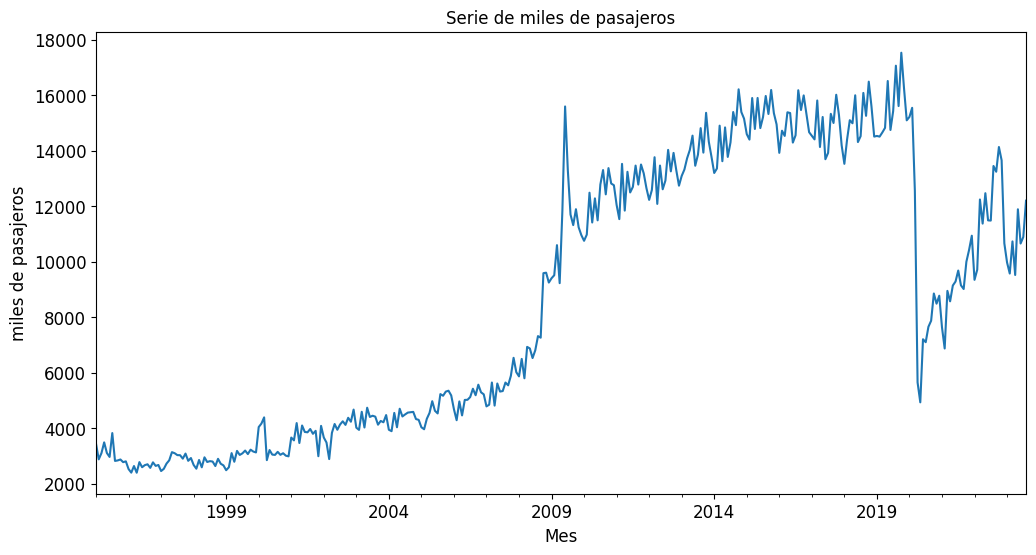

In [ ]:
## GRAFICA DE SERIE
datos['miles de pasajeros'].plot(figsize=(12,6))
plt.xlabel('Mes')
plt.ylabel('miles de pasajeros')
plt.title('Serie de miles de pasajeros')
plt.show()

b) Una media móvil centrada a 6 meses, y explica si la serie tiene tendencia
o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

In [ ]:
## PROMEDIO MEDIAS MOVILES

datos['PMC-6'] = datos['miles de pasajeros'].rolling(6, center=True).mean()

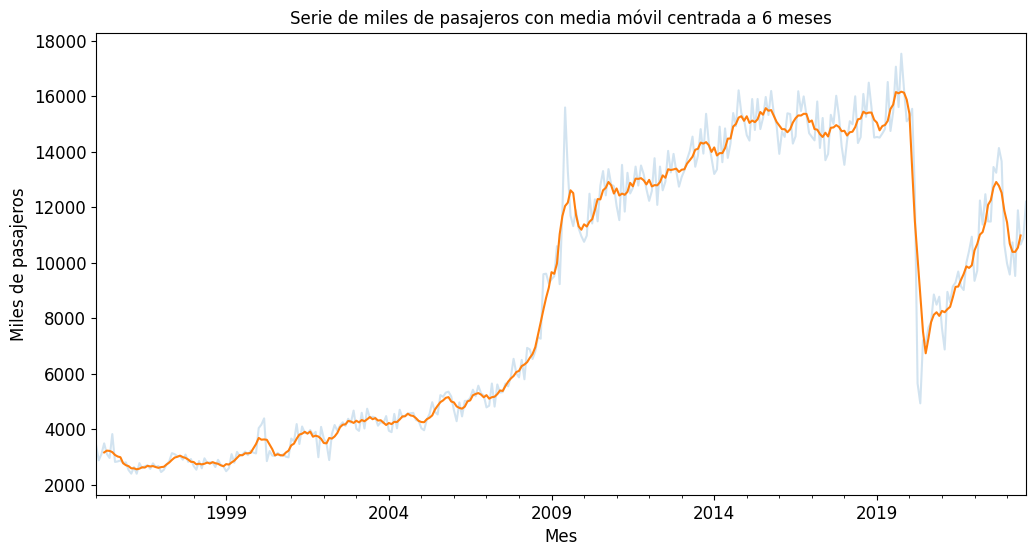

In [ ]:
datos['miles de pasajeros'].plot(alpha=0.2)
datos['PMC-6'].plot(figsize = (12,6))
plt.ylabel('Miles de pasajeros')
plt.title('Serie de miles de pasajeros con media móvil centrada a 6 meses')
plt.xlabel('Mes')
plt.show()

Es evidente que el gráfico muestra una tendencia al aumento a lo largo del tiempo, y se pueden identificar ciclos, como en el año 2008, donde se observa un incremento significativo en el número de pasajeros que utilizan el sistema de metro. Este aumento podría estar relacionado con la expansión de la línea 2 del metro, lo que atrajo a más personas a utilizar este medio de transporte. Sin embargo, en el año 2020, se aprecia una disminución notable, lo cual podría explicarse por la declaración de estado de emergencia en el país debido a la pandemia de COVID-19. Como resultado, muchas personas dejaron de salir o utilizar el metro.






4. El director de Metrorrey planea hacer mantenimiento a las estaciones y los vagones, pero no sabe la fecha adecuada para hacerlo. Utiliza el modelo ETS para obtener el componente estacional de la serie y señala el mes o meses adecuados para dar mantenimiento (8.2 puntos).

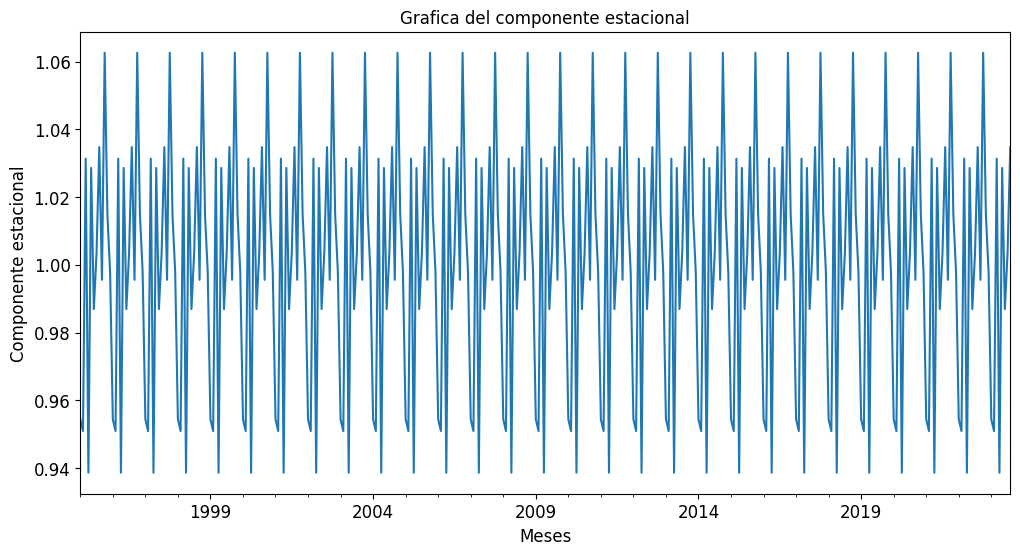

In [ ]:
ets1 = seasonal_decompose(datos["miles de pasajeros"], model= "mult")
ets1.seasonal.plot(figsize = (12,6))
plt.title('Grafica del componente estacional')
plt.xlabel('Meses')
plt.ylabel('Componente estacional')
plt.show();

In [ ]:
ets1.seasonal.head(12)

mes
1995-01-01    0.954408
1995-02-01    0.950919
1995-03-01    1.031340
1995-04-01    0.938619
1995-05-01    1.028585
1995-06-01    0.986927
1995-07-01    1.003497
1995-08-01    1.034753
1995-09-01    0.995570
1995-10-01    1.062610
1995-11-01    1.014896
1995-12-01    0.997875
Freq: MS, Name: seasonal, dtype: float64

El óptimo mes para efectuar labores de mantenimiento es abril, ya que exhibe el componente estacional más reducido. No obstante, en caso de requerir un período prolongado, una elección favorable sería enero y febrero, dado que son los dos meses consecutivos con un componente estacional de menor magnitud. Esta estrategia podría minimizar el impacto en las operaciones habituales y garantizar una eficaz ejecución del mantenimiento.

5. El director de Metrorrey quiere saber los ingresos por pasaje y el número de
pasajeros los siguientes 5 meses. Utiliza el método de Holt-Winters para
pronosticar el número de pasajeros los próximos 5 meses, cada pronóstico
multiplícalo por $7.1 para tener un estimado de los ingresos (8.2 puntos).

In [ ]:
## ESTIMAR EL MODELO

holtwinters_model1 = ExponentialSmoothing(datos['miles de pasajeros'],trend="add", seasonal="mul", seasonal_periods=12).fit()

In [ ]:
## PRONOSTICO A 5 MESES

pronostico_5m = holtwinters_model1.forecast(5)
pronostico_5m

2023-09-01    11441.185911
2023-10-01    11998.364287
2023-11-01    11200.851863
2023-12-01    10433.610889
2024-01-01     9967.179612
Freq: MS, dtype: float64

In [ ]:
pronostico = pd.DataFrame({'Fecha': pronostico_5m.index, 'Miles de pasajeros': pronostico_5m})
pronostico.set_index('Fecha', inplace=True)
pronostico['Ingreso en miles'] = pronostico['Miles de pasajeros']*7.1
Ingresos = pronostico['Ingreso en miles'].sum().round(4)
print(pronostico)
print(f'El ingreso total es de ${Ingresos*1000.}')

            Miles de pasajeros  Ingreso en miles
Fecha                                           
2023-09-01        11441.185911      81232.419972
2023-10-01        11998.364287      85188.386439
2023-11-01        11200.851863      79526.048227
2023-12-01        10433.610889      74078.637313
2024-01-01         9967.179612      70766.975244
El ingreso total es de $390792467.2


6. Realiza un pronóstico de los miles de pasajeros con el modelo ARIMA
cumpliendo los siguientes pasos:

a) Realiza una prueba de raíz unitaria a la serie original (8.2 puntos)

In [ ]:
prueba_dfa = adfuller(datos['miles de pasajeros'])
pvalue = prueba_dfa[1]
pvalue.round(2)

0.58

$H_0:$ NO ESTACIONARIA\
$H_A:$ ESTACIONARIA

Rechazamos $H_0$ si $P-value < \alpha=0.05$

El valor p (p-value) de 0.58 es mayor que el nivel de significancia alpha establecido en 0.05. Por lo tanto, no tenemos evidencia suficiente para rechazar la hipótesis nula (H0). En consecuencia, podemos concluir que la serie de datos "miles de pasajeros" no es estacionaria, ya que no hay suficiente evidencia estadística para afirmar lo contrario.

b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza
la prueba de raíz unitaria para verificar que la serie sea estacionaria (8.2
puntos)

In [ ]:
## CALCULO DE DIFERENCIAS
datos['miles de pasajeros_diff'] = datos['miles de pasajeros'].diff()

In [ ]:
## PRUEBA DICKEY-FULLER
prueba_dfa1 = adfuller(datos['miles de pasajeros_diff'].dropna())
pvalue1 = prueba_dfa1[1]
pvalue1.round(4)

0.0003

$H_0:$ NO ESTACIONARIA\
$H_A:$ ESTACIONARIA

Rechazamos $H_0$ si $P-value < \alpha=0.05$


El valor p (p-value) de 0.0003 es menor que el nivel de significancia alpha establecido en 0.05. Por lo tanto, rechazamos la hipótesis nula (H0). En consecuencia, podemos concluir que la serie de datos "miles de pasajeros" es estacionaria, ya que hay suficiente evidencia estadística para respaldar esta afirmación.

c) Si la serie no es estacionaria repite el paso b hasta que la serie sea
estacionaria.

Sí, en base a la información proporcionada, si el valor p (p-value) es menor que el nivel de significancia alpha (0.0003 < 0.05) y has rechazado la hipótesis nula, entonces puedes concluir que la serie de datos "miles de pasajeros" es estacionaria.

d) Realiza las graficas de autocorrelación de la serie estacionaria para verificar si la serie tiene o no un componente estacional (8.2 puntos)

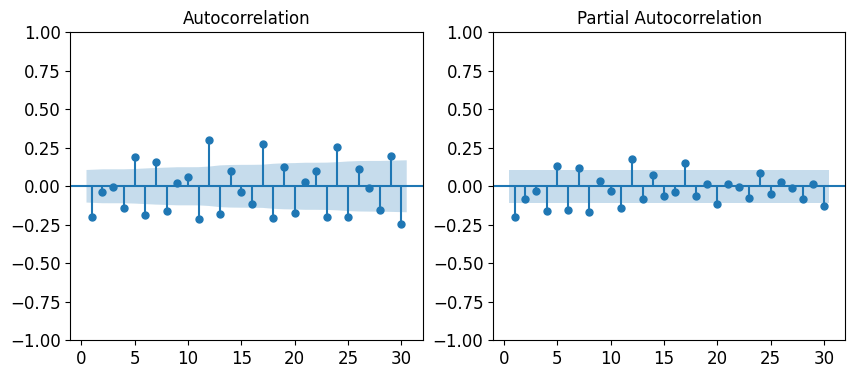

In [ ]:
## GRAFICA DE CORRELACIÓN
ig, ax = plt.subplots(1,2, figsize=(10,4))

## GRAFICA 1
plot_acf(datos['miles de pasajeros_diff'].dropna(), zero=False, lags=30, ax= ax[0])

## GRAFICA 2
plot_pacf(datos['miles de pasajeros_diff'].dropna(), zero=False, lags=30, ax= ax[1])
plt.show();

Entendido, si la serie de datos tiene un componente estacional, significa que muestra patrones repetitivos a lo largo del tiempo, lo que es una característica de las series de tiempo estacionales.

e) Utiliza auto_arima para encontrar el orden del modelo arima, dando el parámetro information_criterion prueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic. (8.2 puntos)

In [ ]:
## ORDEN ARIMA
aic = pm.auto_arima(datos['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              ic='aic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)
print('AIC params')
aic.params

AIC params


<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [ ]:
bic = pm.auto_arima(datos['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              information_criterion='bic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)
print('BIC params')
bic.params

BIC params


<bound method ARIMA.params of ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [ ]:
hqic = pm.auto_arima(datos['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              information_criterion='hqic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)
print('HQIC params')
hqic.params

HQIC params


<bound method ARIMA.params of ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [ ]:
oob = pm.auto_arima(datos['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              information_criterion='oob',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)
print('OOB params')
oob.params

OOB params


<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

Dado que el orden del modelo ARIMA es distinto y mi número de matrícula finaliza en un número impar, voy a utilizar AIC, SARIMA (1,1,3)(1,0,1,12)

f) Con el orden del modelo arima obtenido estima el modelo arima (8.2 puntos)

In [ ]:
model = ARIMA(datos['miles de pasajeros'],
              order = (1, 1, 3),
              seasonal_order=(1,0,1,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.720
Date:                            Sat, 04 Nov 2023   AIC                           5559.440
Time:                                    16:49:30   BIC                           5586.304
Sample:                                01-01-1995   HQIC                          5570.141
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9508      0.039    -24.502      0.000      -1.027      -0.875
ma.L1          0.9153      0.052   

g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021 (8.2 puntos)

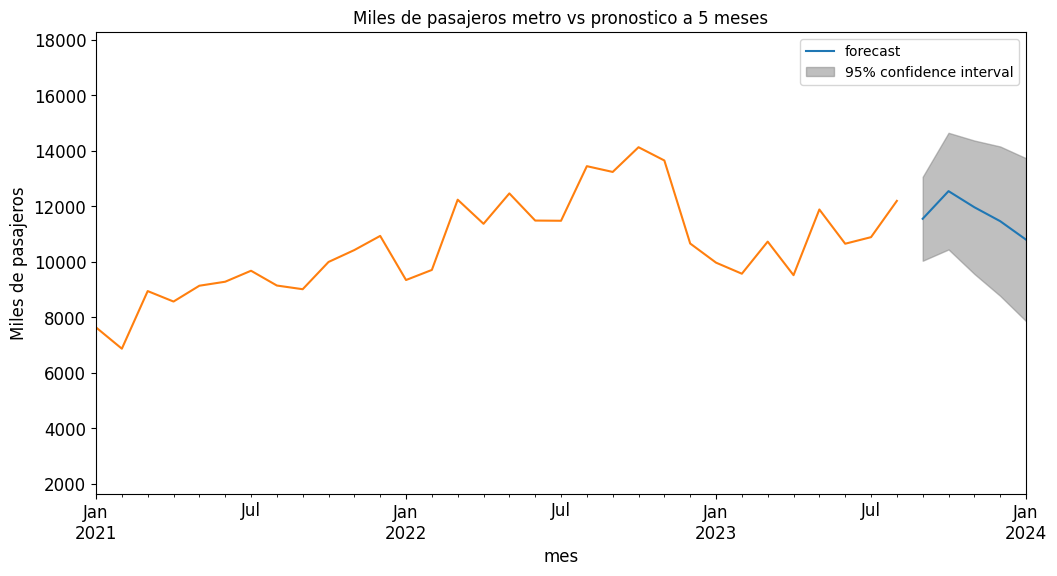

In [ ]:
## GRAFICA DEL PRONOSTICO DEL FUTURO
plot_predict(results,'2023-09-01','2024-01-01')
datos['miles de pasajeros'].plot(figsize=(12,6))
plt.xlim('2021-01-01', '2024-01-01')
plt.title('Miles de pasajeros metro vs pronostico a 5 meses')
plt.ylabel('Miles de pasajeros')
plt.show()

h) Realiza el pronostico a 5 meses con los intervalos de confianza (8.2 puntos)

In [ ]:
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
inicio = '2023-09-01'
fin = '2024-01-01'
pronostico_valor = forecast_mean[inicio:fin]
pronostico_inervalos = forecast_ci.loc[inicio:fin]

In [ ]:
pro_datos = pd.DataFrame({
'pronostico': pronostico_valor,
'limite inferior': pronostico_inervalos.iloc[:,0],
'limite superior': pronostico_inervalos.iloc[:,1]
})

In [ ]:
pro_datos

,pronostico,limite inferior,limite superior
2023-09-01,11557.311635,10044.403686,13070.219584
2023-10-01,12552.886457,10450.941448,14654.831466
2023-11-01,11972.664462,9568.857728,14376.471196
2023-12-01,11470.192543,8778.266259,14162.118827
2024-01-01,10804.637632,7870.050944,13739.224321


i) Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1 (8.2 puntos)

In [ ]:
Ingresos2 = pro_datos*7.1
Ingresos2 = Ingresos2.rename(columns={'pronostico':'Ingresos en miles'})
Ingresos2

,Ingresos en miles,limite inferior,limite superior
2023-09-01,82056.912609,71315.266167,92798.559050
2023-10-01,89125.493847,74201.684282,104049.303412
2023-11-01,85005.917681,67938.889869,102072.945493
2023-12-01,81438.367055,62325.690439,100551.043671
2024-01-01,76712.927190,55877.361700,97548.492680
